In [1]:
import numpy as np
import pandas as pd
import scipy.optimize

from pytres import nnls
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
base_dir = 'example_data//KD74-TCE/'

data_full = pd.read_csv(f'{base_dir}/TRES.txt', sep='\t', header=None)
time_full = data_full[0].values
data_full = data_full.drop(columns=[0]).values
irf = pd.read_csv(f'{base_dir}/IRF.txt', sep='\t', names=['time', 'val'])['val'].values

In [3]:
solver = nnls.TresSolverNNLS(data_full, time_full, irf, n_components=3, wavelength_slice=slice(10, None), time_slice=slice(1050, 6200))

In [4]:
tres_annot = solver.solve()

Findind IRF shift...
Elapsed time: 6.58s
	IRF_shift: -0.02124

Solving TRES...
Elapsed time: 15.20s
	message: Optimization terminated successfully.
	nit: 76
	fun: 353965.37769984617
	x: [0.6549887  5.60773644 2.52080941]


(0.9970883796851433, 0.004747133318883388, True)
(6250, 79)
(8.4, 49.6)


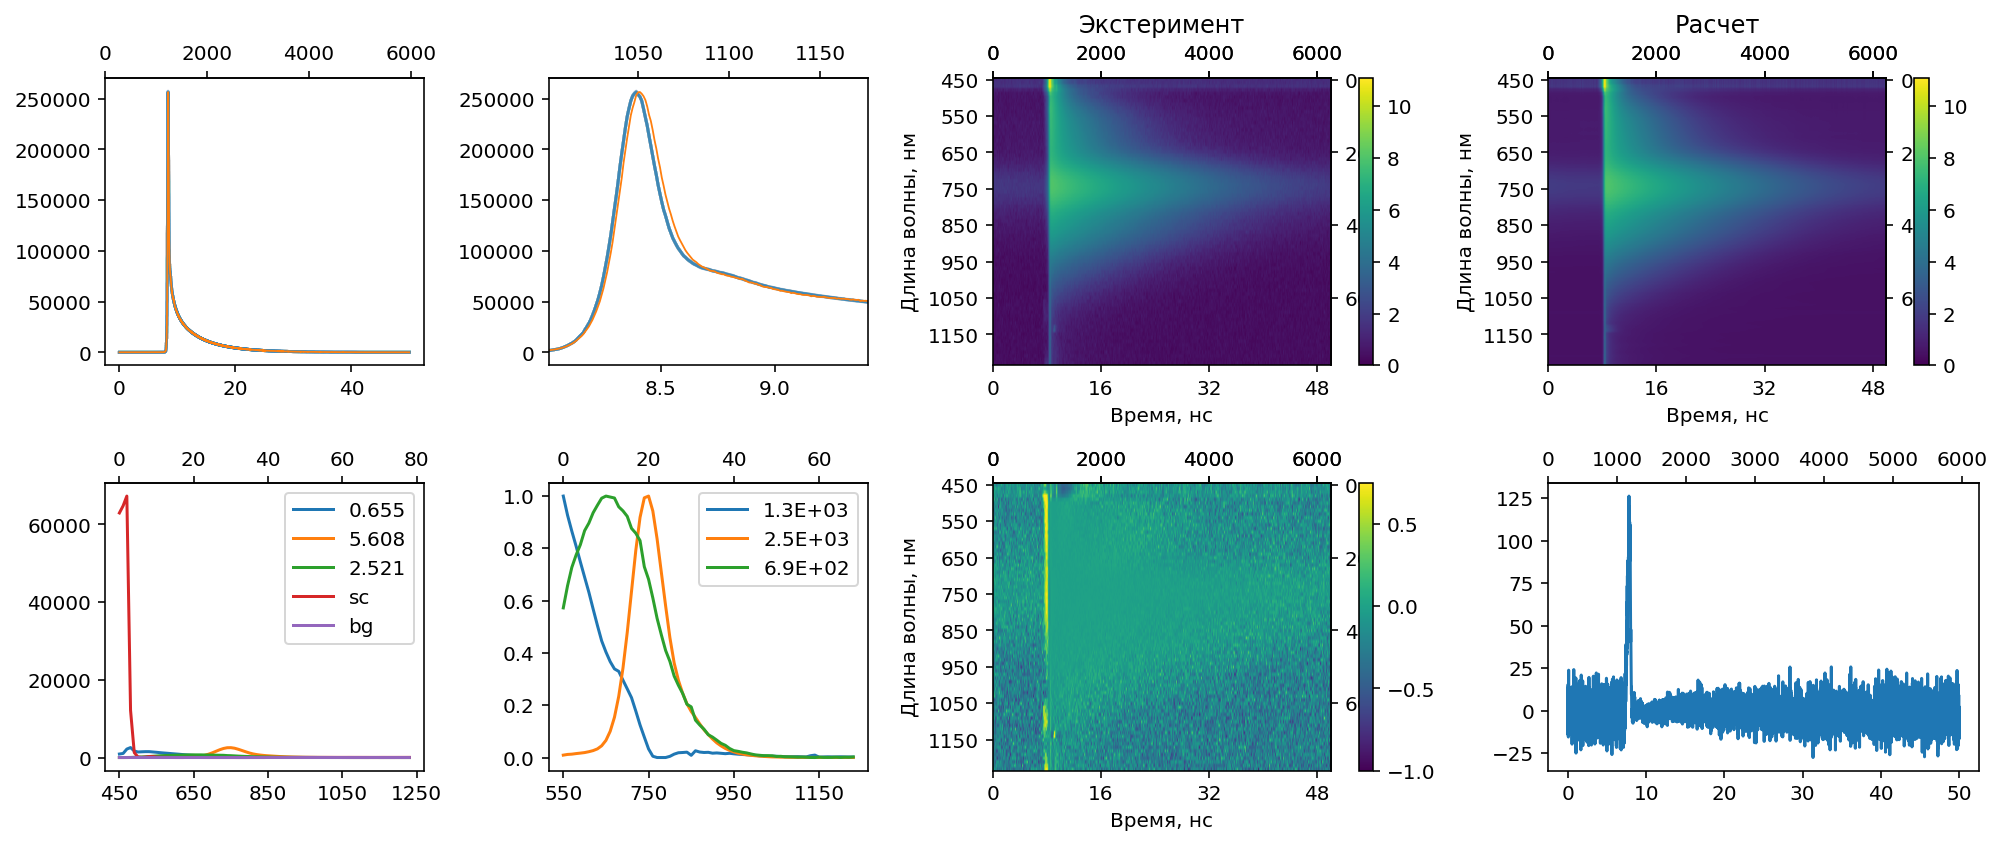

In [5]:
tres_annot.plot_summary()

In [6]:
pt, init = solver.compute_confidence_indervals(random=False)

[0.10067158 0.15094939 0.27023025]


  0%|          | 0/404 [00:00<?, ?it/s]

Lifetimes CI:
0.661 +/- 0.122
5.620 +/- 0.175
2.562 +/- 0.372
